## /collections/{collection_id}/processes/area:retrieve


In [1]:
import xarray as xr
import requests
from IPython.display import GeoJSON
from shapely.geometry import mapping, box 
import numpy as np

In [2]:
dapa_endpoint = 'http://0.0.0.0:8000'

### Get the DAPA collections

In [3]:
query = '{}/collections'.format(dapa_endpoint)

In [4]:
r = requests.get(query)

In [5]:
r.status_code

200

In [6]:
r.json()

{'collections': [{'id': 'S5P-NO2',
   'title': 'Sentinel-5P NO2 column number density over Europe',
   'extent': {'spatial': {'bbox': [[-13, 57, 33, 33]], 'crs': 'EPSG:4326'},
    'temporal': {'interval': [['2018-05-01T00:00:00/2020-04-01T00:00:00']]}}}]}

In [7]:
collection_bbox = r.json()['collections'][0]['extent']['spatial']['bbox']

In [8]:
collection_bbox

[[-13, 57, 33, 33]]

In [9]:
GeoJSON([{'type': 'Feature', 
          'properties': {},
          'geometry': mapping(box(*collection_bbox[0]))}])

<IPython.display.GeoJSON object>

In [10]:
collection = r.json()['collections'][0]['id']

collection

'S5P-NO2'

### Get the collection variables

In [11]:
query = '{}/collections/{}/variables'.format(dapa_endpoint, collection)

In [12]:
r = requests.get(query)

In [13]:
r.status_code

200

In [14]:
variables = r.json()

variables

{'variables': [{'id': 'tropospheric_NO2_column_number_density',
   'title': 'Troposheric NO2 column number density',
   'uom': 'umol/m2'}]}

In [15]:
variable = variables['variables'][0]['id']

variable

'tropospheric_NO2_column_number_density'

### /collections/{collection_id}/processes/area:retrieve

In [16]:
location = 'Paris, France'

In [17]:
query = '{}/geothesaurus'.format(dapa_endpoint)

In [18]:
params = {'location': location}

In [19]:
r = requests.get(query, params=params)

In [20]:
r.status_code

200

In [21]:
GeoJSON(r.json())

<IPython.display.GeoJSON object>

In [22]:
query = '{}/collections/{}/processes/area:retrieve'.format(dapa_endpoint,
                                                                  collection)

query

'http://0.0.0.0:8000/collections/S5P-NO2/processes/area:retrieve'

In [23]:
params = {'location': location,
          'variable': variable}

Submit the request:

In [24]:
r = requests.get(query, params=params)

Get the HTTP exit code:

In [25]:
r.status_code

200

Print the response

In [26]:
r.json()

{'dims': ['date', 'y', 'x'],
 'attrs': {'transform': [0.02197265625,
   0.0,
   -13.0078125,
   0.0,
   -0.02197265625,
   57.01904296875],
  'crs': '+init=epsg:4326',
  'res': [0.02197265625, 0.02197265625],
  'is_tiled': 0,
  'nodatavals': [9.969209968386869e+36],
  'scales': [1.0],
  'offsets': [0.0],
  'AREA_OR_POINT': 'Area',
  'latitude#units': 'degree_north',
  'longitude#units': 'degree_east',
  'NC_GLOBAL#Conventions': 'HARP-1.0',
  'NC_GLOBAL#datetime_start': '6695.090290335648',
  'NC_GLOBAL#datetime_stop': '6725.99574832176',
  'NC_GLOBAL#history': "2020-05-07T18:08:44Z [harp-1.10] harpmerge -a 'tropospheric_NO2_column_number_density_validity>75;keep(tropospheric_NO2_column_number_density, latitude, latitude_bounds, longitude, longitude_bounds, datetime_start, datetime_length);derive(datetime_stop {time} [days since 2000-01-01]);derive(datetime_start [days since 2000-01-01]);exclude(datetime_length);bin_spatial(8193, -90, 0.02197265625, 16385, -180, 0.02197265625);derive(la

In [27]:
xr.DataArray.from_dict(r.json())

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24, y: 4, x: 11)>
array([[[ 87.39471436,  92.51070404,  98.10374451, ...,  94.32688141,
          93.93308258,  95.68144226],
        [ 91.65558624,  95.53772736, 101.79533386, ...,  99.27816772,
          97.66592407,  98.39228058],
        [ 91.39596558,  93.89008331, 100.84641266, ..., 103.32373047,
         101.00444031,  99.10166931],
        [ 96.47353363, 100.71057892, 104.87663269, ..., 106.05647278,
         104.1901474 , 101.26545715]],

       [[ 77.48561096,  93.35020447, 100.09320831, ..., 100.05353546,
          95.8660202 ,  90.58248901],
        [ 88.72629547, 102.25305176, 109.21685028, ..., 103.94364166,
          96.13230896,  91.29322815],
        [102.96576691, 110.04226685, 114.78833008, ..., 118.19953156,
         107.9209671 , 100.21784973],
        [107.47022247, 113.47516632, 115.67963409, ..., 117.77417755,
         109.16379547,  98.61412048]],

       [[ 92.04463959,  96.83643341, 106.07133484, ..., 106.39385223,
         102.92351532,  88.6015625 ],
        [ 85.71188354,  87.71375275,  95.37526703, ...,  99.01559448,
          89.92706299,  87.02931213],
        [ 99.16649628, 107.95754242, 115.05617523, ..., 101.3608017 ,
          84.18909454,  80.4577179 ],
        [110.16567993, 120.92137146, 126.04301453, ..., 103.06175995,
          87.58585358,  80.15873718]],

       ...,

       [[ 88.18549347,  87.47291565,  86.90530396, ...,  92.69412231,
          87.04714203,  85.63583374],
        [ 79.26439667,  86.62166595,  91.41764832, ...,  86.79064178,
          82.7882843 ,  78.24382019],
        [ 79.53373718,  89.897789  ,  83.71937561, ...,  77.53594971,
          75.25571442,  70.68863678],
        [ 71.5897522 ,  77.79190063,  80.35245514, ...,  75.10347748,
          72.48739624,  70.02175903]],

       [[ 75.88168335,  77.28276062,  76.93770599, ...,  73.52887726,
          71.96011353,  68.52862549],
        [ 76.22702789,  78.24845886,  77.94777679, ...,  71.86462402,
          71.25756836,  68.23124695],
        [ 73.96644592,  74.76609039,  77.51044464, ...,  72.73927307,
          70.24649048,  68.18191528],
        [ 74.4741745 ,  73.55036926,  77.94675446, ...,  74.40794373,
          69.63261414,  67.44249725]],

       [[ 71.58709717,  73.33903503,  75.02533722, ...,  65.71749878,
          61.98894119,  57.75169754],
        [ 76.91078949,  77.83050537,  78.5453949 , ...,  71.80644226,
          67.17398071,  62.91493988],
        [ 79.59866333,  80.06131744,  76.73142242, ...,  70.45379639,
          66.9174881 ,  62.7941246 ],
        [ 74.52445221,  75.19521332,  75.29916382, ...,  65.9913559 ,
          63.43209457,  59.16942215]]])
Coordinates:
  * date     (date) <U19 '2018-05-01T00:00:00' ... '2020-04-01T00:00:00'
  * x        (x) float64 2.23 2.252 2.274 2.296 2.318 ... 2.384 2.406 2.428 2.45
  * y        (y) float64 48.9 48.88 48.86 48.83
Attributes:
    transform:                                           [0.02197265625, 0.0,...
    crs:                                                 +init=epsg:4326
    res:                                                 [0.02197265625, 0.02...
    is_tiled:                                            0
    nodatavals:                                          [9.969209968386869e+36]
    scales:                                              [1.0]
    offsets:                                             [0.0]
    AREA_OR_POINT:                                       Area
    latitude#units:                                      degree_north
    longitude#units:                                     degree_east
    NC_GLOBAL#Conventions:                               HARP-1.0
    NC_GLOBAL#datetime_start:                            6695.090290335648
    NC_GLOBAL#datetime_stop:                             6725.99574832176
    NC_GLOBAL#history:                                   2020-05-07T18:08:44Z...
    NETCDF_DIM_EXTRA:                                    {time}
    tropos

In [28]:
area_retrieved = xr.DataArray.from_dict(r.json()).assign_coords(date=[np.datetime64(d) for d in xr.DataArray.from_dict(r.json())['date'].values])

In [29]:
area_retrieved

<xarray.DataArray 'tropospheric_NO2_column_number_density' (date: 24, y: 4, x: 11)>
array([[[ 87.39471436,  92.51070404,  98.10374451, ...,  94.32688141,
          93.93308258,  95.68144226],
        [ 91.65558624,  95.53772736, 101.79533386, ...,  99.27816772,
          97.66592407,  98.39228058],
        [ 91.39596558,  93.89008331, 100.84641266, ..., 103.32373047,
         101.00444031,  99.10166931],
        [ 96.47353363, 100.71057892, 104.87663269, ..., 106.05647278,
         104.1901474 , 101.26545715]],

       [[ 77.48561096,  93.35020447, 100.09320831, ..., 100.05353546,
          95.8660202 ,  90.58248901],
        [ 88.72629547, 102.25305176, 109.21685028, ..., 103.94364166,
          96.13230896,  91.29322815],
        [102.96576691, 110.04226685, 114.78833008, ..., 118.19953156,
         107.9209671 , 100.21784973],
        [107.47022247, 113.47516632, 115.67963409, ..., 117.77417755,
         109.16379547,  98.61412048]],

       [[ 92.04463959,  96.83643341, 106.07133484, ..., 106.39385223,
         102.92351532,  88.6015625 ],
        [ 85.71188354,  87.71375275,  95.37526703, ...,  99.01559448,
          89.92706299,  87.02931213],
        [ 99.16649628, 107.95754242, 115.05617523, ..., 101.3608017 ,
          84.18909454,  80.4577179 ],
        [110.16567993, 120.92137146, 126.04301453, ..., 103.06175995,
          87.58585358,  80.15873718]],

       ...,

       [[ 88.18549347,  87.47291565,  86.90530396, ...,  92.69412231,
          87.04714203,  85.63583374],
        [ 79.26439667,  86.62166595,  91.41764832, ...,  86.79064178,
          82.7882843 ,  78.24382019],
        [ 79.53373718,  89.897789  ,  83.71937561, ...,  77.53594971,
          75.25571442,  70.68863678],
        [ 71.5897522 ,  77.79190063,  80.35245514, ...,  75.10347748,
          72.48739624,  70.02175903]],

       [[ 75.88168335,  77.28276062,  76.93770599, ...,  73.52887726,
          71.96011353,  68.52862549],
        [ 76.22702789,  78.24845886,  77.94777679, ...,  71.86462402,
          71.25756836,  68.23124695],
        [ 73.96644592,  74.76609039,  77.51044464, ...,  72.73927307,
          70.24649048,  68.18191528],
        [ 74.4741745 ,  73.55036926,  77.94675446, ...,  74.40794373,
          69.63261414,  67.44249725]],

       [[ 71.58709717,  73.33903503,  75.02533722, ...,  65.71749878,
          61.98894119,  57.75169754],
        [ 76.91078949,  77.83050537,  78.5453949 , ...,  71.80644226,
          67.17398071,  62.91493988],
        [ 79.59866333,  80.06131744,  76.73142242, ...,  70.45379639,
          66.9174881 ,  62.7941246 ],
        [ 74.52445221,  75.19521332,  75.29916382, ...,  65.9913559 ,
          63.43209457,  59.16942215]]])
Coordinates:
  * date     (date) datetime64[ns] 2018-05-01 2018-06-01 ... 2020-04-01
  * x        (x) float64 2.23 2.252 2.274 2.296 2.318 ... 2.384 2.406 2.428 2.45
  * y        (y) float64 48.9 48.88 48.86 48.83
Attributes:
    transform:                                           [0.02197265625, 0.0,...
    crs:                                                 +init=epsg:4326
    res:                                                 [0.02197265625, 0.02...
    is_tiled:                                            0
    nodatavals:                                          [9.969209968386869e+36]
    scales:                                              [1.0]
    offsets:                                             [0.0]
    AREA_OR_POINT:                                       Area
    latitude#units:                                      degree_north
    longitude#units:                                     degree_east
    NC_GLOBAL#Conventions:                               HARP-1.0
    NC_GLOBAL#datetime_start:                            6695.090290335648
    NC_GLOBAL#datetime_stop:                             6725.99574832176
    NC_GLOBAL#history:                                   2020-05-07T18:08:44Z...
    NETCDF_DIM_EXTRA:                                    {time}
    troposp

In [30]:
area_retrieved.values

array([[[ 87.39471436,  92.51070404,  98.10374451, ...,  94.32688141,
          93.93308258,  95.68144226],
        [ 91.65558624,  95.53772736, 101.79533386, ...,  99.27816772,
          97.66592407,  98.39228058],
        [ 91.39596558,  93.89008331, 100.84641266, ..., 103.32373047,
         101.00444031,  99.10166931],
        [ 96.47353363, 100.71057892, 104.87663269, ..., 106.05647278,
         104.1901474 , 101.26545715]],

       [[ 77.48561096,  93.35020447, 100.09320831, ..., 100.05353546,
          95.8660202 ,  90.58248901],
        [ 88.72629547, 102.25305176, 109.21685028, ..., 103.94364166,
          96.13230896,  91.29322815],
        [102.96576691, 110.04226685, 114.78833008, ..., 118.19953156,
         107.9209671 , 100.21784973],
        [107.47022247, 113.47516632, 115.67963409, ..., 117.77417755,
         109.16379547,  98.61412048]],

       [[ 92.04463959,  96.83643341, 106.07133484, ..., 106.39385223,
         102.92351532,  88.6015625 ],
        [ 85.71188354,  

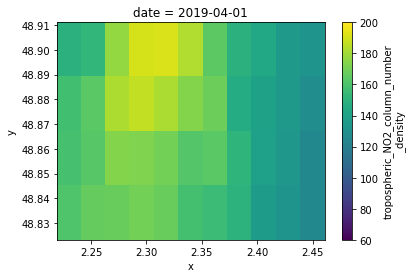

In [31]:
area_retrieved.sel(date='2019-04-01T00:00:00').plot(vmin=60, vmax=200)

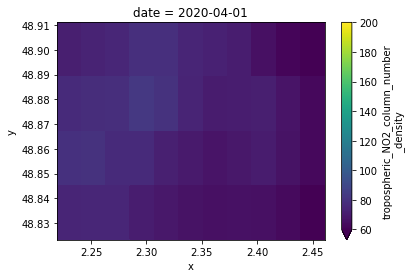

In [32]:
area_retrieved.sel(date='2020-04-01T00:00:00').plot(vmin=60, vmax=200)